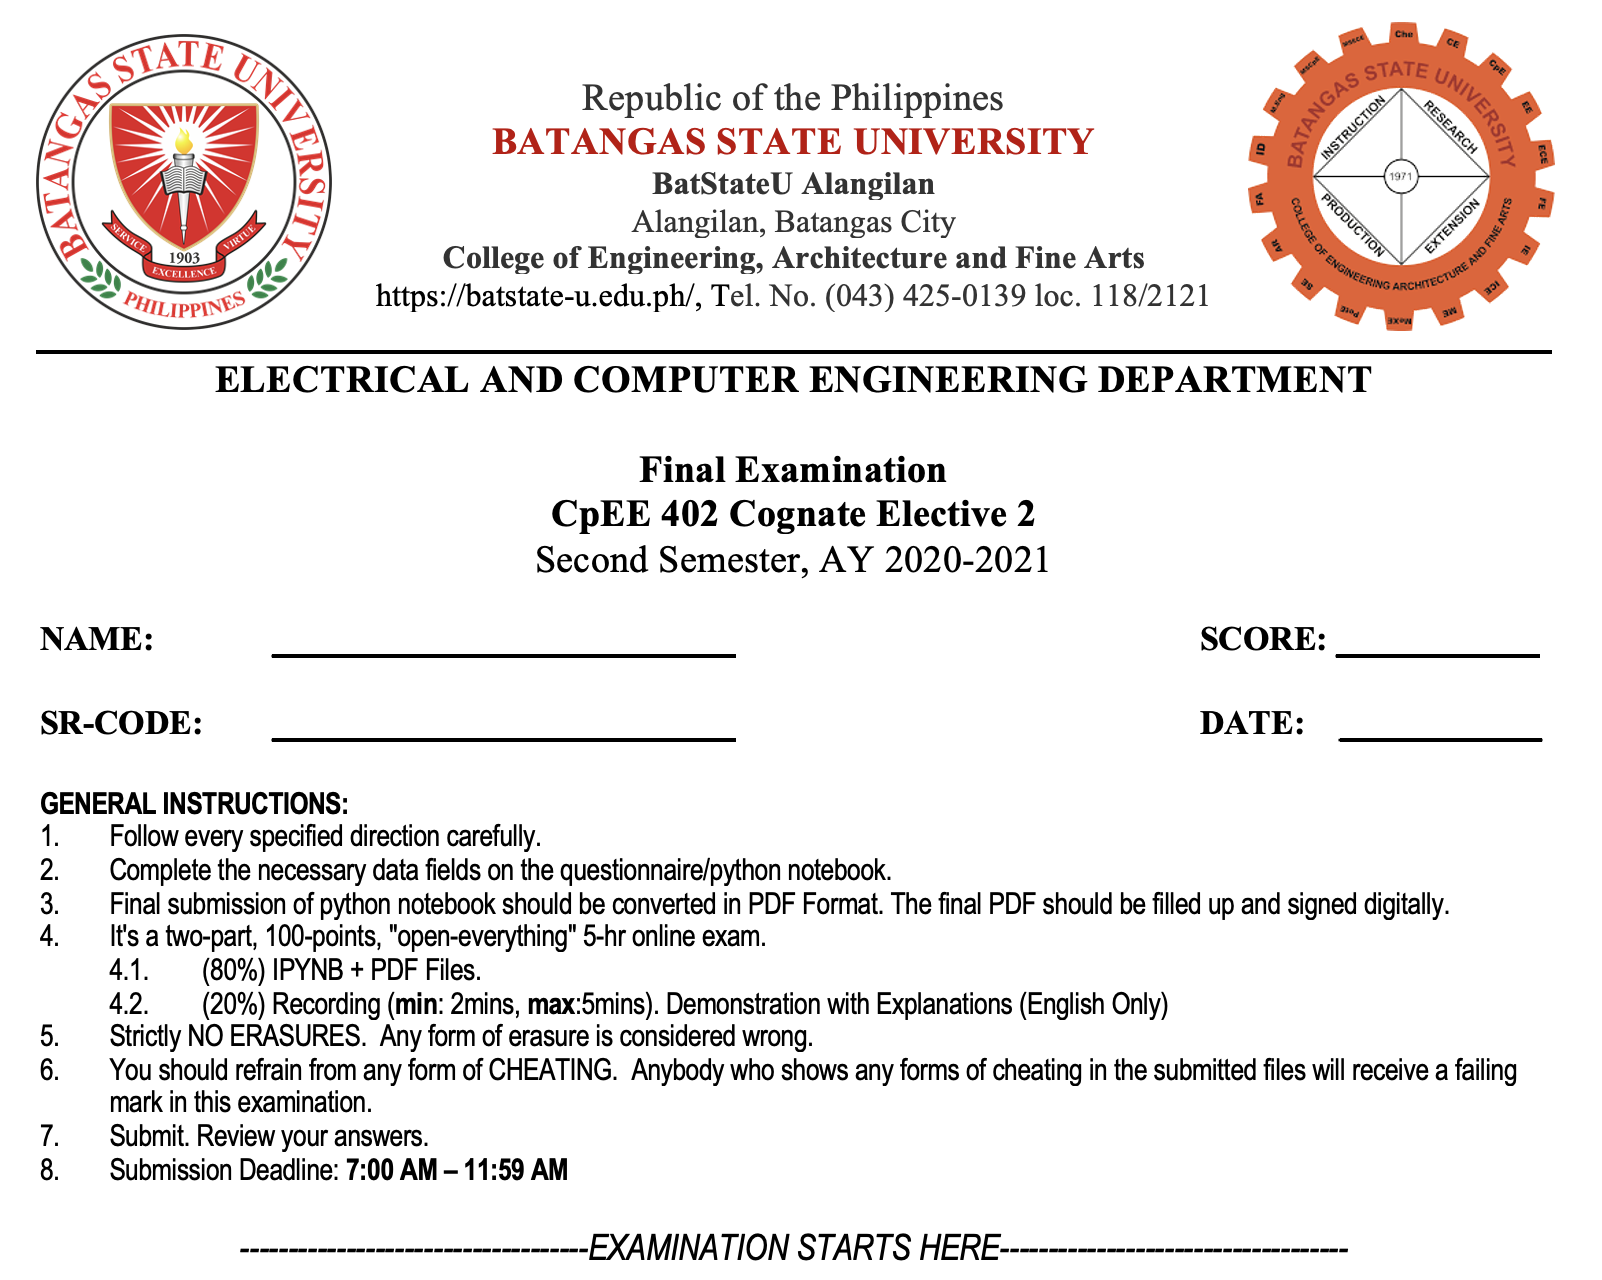

## I. PROBLEM STATEMENT

Define and Explain the classification problem you want to solve. (Min of 100, Max of 300 Words)

Heart disease (HD) is a collection of diseases and conditions that cause cardiovascular problems. (Whithworth,2020) It is one of the most common diseases today, and early detection is critical for many health care providers in order to protect their patients from developing the disease and save lives. Every year, according to the World Health Organization, 12 million people die from heart diseases around the world. Cardiovascular diseases account for half of all deaths in the United States and other developed countries. The ability to predict the diagnosis of cardiovascular diseases early can help high-risk patients make lifestyle changes and, as a result, reduce complications. The goal of this study is to identify the most important/risk factors for heart disease and to use logistic regression to predict the overall risk.

## II. DATASET DESCRIPTION

Look for Public Datasets. Define and Explain the dataset you will use for classification-ensemble problem you want to solve. Include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)

The dataset comes from an ongoing cardiovascular study involving residents of Framingham, Massachusetts, and is publicly available on the Kaggle website (https://www.kaggle.com/danimal/heartdiseaseensembleclassifier). Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. There are over 4,000 records and 15 attributes in total. Each characteristic has the potential to be a risk factor. Risk factors include demographic, behavioral, and medical factors. It includes demographic dataset of nominal values which includes: sex, current smoker, blood pressure medication, prevalent stroke, prevalent hypertensive, and diabetes. Whereas, ordinal values includes: systolic blood pressure, cholesterol level, body mass index, heart rate, the number of cigarettes that the person smoked on average in one day, and glucose level. 

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data

In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [30]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Get an overview of the dataset:

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
data.shape

(303, 14)

### 3. Print the first five and last five rows of the dataset

In [33]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 4. Find the summary statistics of the dataset

In [34]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

In [35]:
categorical_val = []
continous_val = []
for column in data.columns:
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [36]:
categorical_val.remove("target")
dataset = pd.get_dummies(data, columns = categorical_val)

In [37]:
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [38]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [39]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [40]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [41]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [15]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap.

Text(0.5, 1.0, 'Correlation Heatmap')

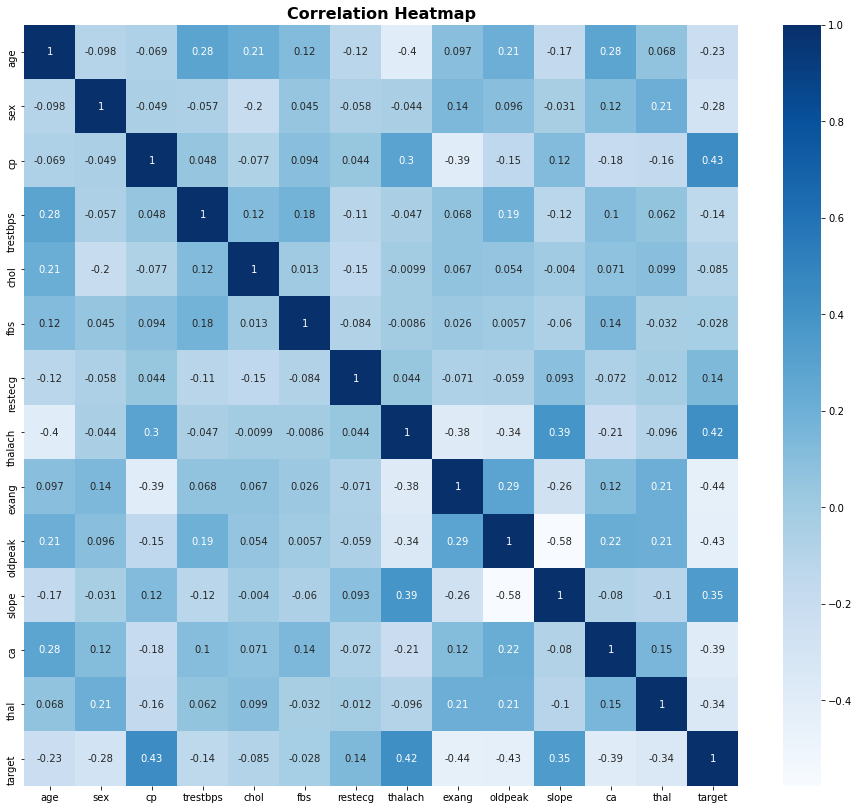

In [16]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(), cmap='Blues', annot = True)
plt.title("Correlation Heatmap", fontweight = "bold", fontsize=16)

### 7. Delete the columns having more than 80% of values missing.

In [16]:
missing_data

,count_missing,perc_missing
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 9. Use OneHotEncoder. Process the dataset to convert all features to numerical values. First, find the number of columns that will stay in their original form (that is, numerical features) and that need to be one-hot encoded (that is, the categorical features). Use OneHotEncoder.

In [55]:
data.sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [56]:
data.fbs

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [57]:
data.exang

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 303, dtype: int64

### 10. Export the Cleaned Dataset.

In [47]:
data.to_csv('heart.csv')

## IV.  AI MODELLING - APPLIED CLASSIFICATION ANALYSIS (ACA) using ENSEMBLE

### 1. Import the required dependencies.

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 2. Read the cleaned data.

In [22]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### 3. Divide the dataset into train and validation DataFrames.



In [45]:
X = dataset.drop('target', axis=1)
y = dataset.target

In [46]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Construct an Ensemble model (STACKING Ensemble) using 2 base classifiers and 1 stacked model as classifier. 

NOTE: 
1. Hyperparameter Tuning: Choose a base classifier model and define the range of hyperparameter values corresponding to the model to be searched over for hyperparameter tuning. Use RandomizedSearchCV or any Hyperparameter tuning techniques. 
2. Once the tuning is complete, find the position (iteration number) at which the highest mean test score was obtained. Find the corresponding hyperparameters to be used for your based models and stacked model.
3. Split the dataset into training and validation sets and train a new model using the final hyperparameters on the training dataset. Use scikit-learn's train_test_split() method to split X and y into train and test components, with test comprising 15% of the dataset or any which can attain your target accuracy:
4. Train both your base models and stacked model using the final hyperparamters used from the hyperparameter tuning done in step 2.

In [47]:
def print_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_val)
        clf_report = pd.DataFrame(classification_report(y_val, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

### Base Classifer Model 1: Support Vector Machine Hyperparameter Tuning.

In [48]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
svm_params = svm_cv.best_params_

svm_clf = SVC(**svm_params)
svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:    8.3s finished


0.8773584905660378

### Base Classifer Model 2: Decision Tree Hyperparameter Tuning.

In [49]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 9800 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   54.2s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       splitter='random')

### Base Classifier Model 3: 

In [50]:
scores= []
for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    scores.append(accuracy_score(y_val,knn.predict(X_val)))

In [51]:
knn= KNeighborsClassifier(n_neighbors= 13)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_val)
accuracy_score(y_val,knnpred)

0.8571428571428571

### Base Classifier Model 4: 

In [52]:
ad=AdaBoostClassifier(learning_rate= 0.2,n_estimators= 100)
ad.fit(X_train,y_train)
adpred= ad.predict(X_val)
accuracy_score(y_val,adpred)

0.8461538461538461

### Base Classifier Model 5:

In [53]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)
predgb= gb.predict(X_val)
accuracy_score(y_val,predgb)

0.7802197802197802

In [54]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rfpred= rf.predict(X_val)
accuracy_score(y_val,rfpred)

0.8461538461538461

### 5. Calculate the accuracy, precision, and recall for predictions on the validation set, and print the confusion matrix (Target F1-Score >= 80%):

#### Base Classifier Model 1 Results: (Support Vector Machine Classifier)

In [55]:
print_score(svm_clf, X_train, y_train, X_val, y_val, train=True)
print_score(svm_clf, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 87.74%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.881720    0.873950  0.877358    0.877835      0.877505
recall      0.845361    0.904348  0.877358    0.874854      0.877358
f1-score    0.863158    0.888889  0.877358    0.876023      0.877116
support    97.000000  115.000000  0.877358  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.846154   0.846154  0.846154   0.846154      0.846154
recall      0.804878   0.880000  0.846154   0.842439      0.846154
f1-score    0.825000   0.862745  0.846154   0.843873      0.845739
support    41.000000  50.000000  0.846154  91.000000     91.000000
_____________

#### Base Classifier Model 2 Results: (Decision Tree Classifier)

In [56]:
print_score(tree_clf, X_train, y_train, X_val, y_val, train=True)
print_score(tree_clf, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 91.51%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.883495    0.944954  0.915094    0.914225      0.916834
recall      0.938144    0.895652  0.915094    0.916898      0.915094
f1-score    0.910000    0.919643  0.915094    0.914821      0.915231
support    97.000000  115.000000  0.915094  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 91   6]
 [ 12 103]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.708333   0.837209  0.769231   0.772771      0.779144
recall      0.829268   0.720000  0.769231   0.774634      0.769231
f1-score    0.764045   0.774194  0.769231   0.769119      0.769621
support    41.000000  50.000000  0.769231  91.000000     91.000000
_____________

#### Base Classifier Model 3 Results: (KNN)

In [57]:
print_score(knn, X_train, y_train, X_val, y_val, train=True)
print_score(knn, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 85.85%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.868132    0.851240  0.858491    0.859686      0.858969
recall      0.814433    0.895652  0.858491    0.855043      0.858491
f1-score    0.840426    0.872881  0.858491    0.856653      0.858031
support    97.000000  115.000000  0.858491  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [ 12 103]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_____________

In [58]:
print_score(ad, X_train, y_train, X_val, y_val, train=True)
print_score(ad, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 89.62%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.894737    0.897436  0.896226    0.896086      0.896201
recall      0.876289    0.913043  0.896226    0.894666      0.896226
f1-score    0.885417    0.905172  0.896226    0.895295      0.896133
support    97.000000  115.000000  0.896226  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  12]
 [ 10 105]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.800000   0.891304  0.846154   0.845652      0.850167
recall      0.878049   0.820000  0.846154   0.849024      0.846154
f1-score    0.837209   0.854167  0.846154   0.845688      0.846527
support    41.000000  50.000000  0.846154  91.000000     91.000000
_____________

In [59]:
print_score(gb, X_train, y_train, X_val, y_val, train=True)
print_score(gb, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.733333   0.826087   0.78022   0.779710      0.784297
recall      0.804878   0.760000   0.78022   0.782439      0.780220
f1-score    0.767442   0.791667   0.78022   0.779554      0.780752
support    41.000000  50.000000   0.78022  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


In [60]:
print_score(rf, X_train, y_train, X_val, y_val, train=True)
print_score(rf, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:
                   0      1  accuracy  macro avg  weighted avg
precision   0.829268   0.86  0.846154   0.844634      0.846154
recall      0.829268   0.86  0.846154   0.844634      0.846154
f1-score    0.829268   0.86  0.846154   0.844634      0.846154
support    41.000000  50.00  0.846154  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 7 43]]


### 6. Plot the precision-recall curve or the AUC-ROC Curve:

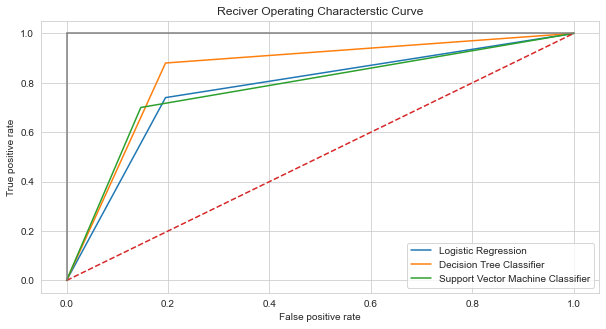

In [112]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_val,lr_preds_val)
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_val,tree_pred)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_val,svm_pred)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='Decision Tree Classifier')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Support Vector Machine Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### 7. Predict the final values on the test dataset.

In [78]:
X_train_with_metapreds = np.zeros((X_train.shape[0], X_train.shape[1]+3))
X_train_with_metapreds[:, :-3] = X_train
X_train_with_metapreds[:, -3:] = -1
print(X_train_with_metapreds)

[[-1.69473524 -2.14880232 -0.91340011 ... -1.         -1.
  -1.        ]
 [-2.7976235  -0.09273778 -0.81677269 ... -1.         -1.
  -1.        ]
 [-0.48155814 -0.66386682 -0.52689046 ... -1.         -1.
  -1.        ]
 ...
 [ 1.61392956  1.62064933 -0.23700823 ... -1.         -1.
  -1.        ]
 [-0.92271345 -0.66386682  0.05287401 ... -1.         -1.
  -1.        ]
 [ 0.9521966   0.47839125 -0.99070203 ... -1.         -1.
  -1.        ]]


In [79]:
den = KFold(n_splits=3)

for train_indices, val_indices in den.split(X_train):
    kfold_X_train, kfold_X_val = X_train.iloc[train_indices], X_train.iloc[val_indices]
    kfold_y_train, kfold_y_val = y_train.iloc[train_indices], y_train.iloc[val_indices]
    
    svm_clf = SVC(**svm_params)
    svm_clf.fit(X_train,y_train)
    svm_pred = svm_clf.predict(kfold_X_val)
    
    tree_clf = DecisionTreeClassifier(**best_params)
    tree_clf.fit(X_train,y_train)
    tree_pred = tree_clf.predict(kfold_X_val)
    
    ad=AdaBoostClassifier(learning_rate= 0.2,n_estimators= 100)
    ad.fit(X_train,y_train)
    ad_pred = ad.predict(kfold_X_val)
    
    X_train_with_metapreds[val_indices, -3] = tree_pred
    X_train_with_metapreds[val_indices, -2] = ad_pred
    X_train_with_metapreds[val_indices, -1] = svm_pred

In [80]:
X_val_with_metapreds = np.zeros((X_val.shape[0], X_val.shape[1]+3))
X_val_with_metapreds[:, :-3] = X_val
X_val_with_metapreds[:, -3:] = -1
print(X_val_with_metapreds)

[[ 0.29046364  1.04952029  0.57466203 ... -1.         -1.
  -1.        ]
 [ 0.5110413   2.19177836  0.80656782 ... -1.         -1.
  -1.        ]
 [ 0.29046364  1.04952029 -2.32416031 ... -1.         -1.
  -1.        ]
 ...
 [ 1.39335191 -1.46344747 -0.44958853 ... -1.         -1.
  -1.        ]
 [ 0.40075247 -1.52056038 -0.12105533 ... -1.         -1.
  -1.        ]
 [ 2.38595135  0.47839125 -0.95205107 ... -1.         -1.
  -1.        ]]


In [81]:
    svm_clf = SVC(**svm_params)
    svm_clf.fit(X_train, y_train)
    svm_pred = svm_clf.predict(X_val)
    
    tree_clf = DecisionTreeClassifier(**best_params)
    tree_clf.fit(X_train,y_train)
    tree_pred = tree_clf.predict(X_val)
    
    ad=AdaBoostClassifier(learning_rate= 0.2,n_estimators= 100)
    ad.fit(X_train,y_train)
    ad_pred = ad.predict(X_val)
    
    X_val_with_metapreds[:, -3] = tree_pred
    X_val_with_metapreds[:, -2] = ad_pred
    X_val_with_metapreds[:, -1] = svm_pred

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_with_metapreds, y_train)
lr_predict = lr.predict(X_train_with_metapreds)
lr_preds_val = lr.predict(X_val_with_metapreds)
lr.score(X_val_with_metapreds, y_val)

0.8021978021978022

In [83]:
lr.score(X_train_with_metapreds, y_train)

0.9009433962264151

### 8. Export the Final Model using PICKLE Library.

In [33]:
import pickle
filename = 'Manalo.pkl'
pickle.dump(lr,open(filename,'wb'))

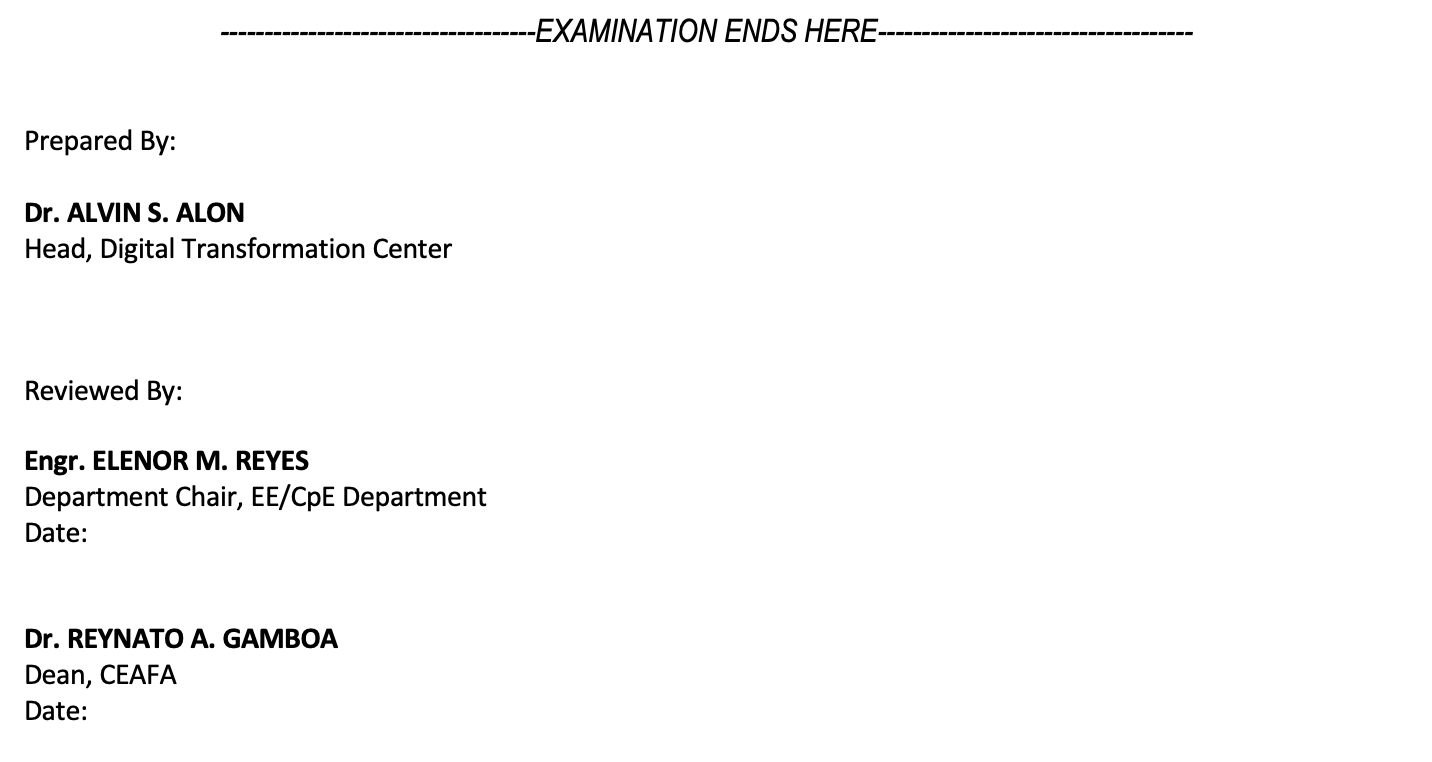